In [7]:
from __future__ import division
import os
import sys
import copy
import numpy as np
from numpy import ma
import math as m
import pandas as pd
import string

import pickle
from numpy import genfromtxt
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
plt.style.use('default')
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
import matplotlib.colors as colors

import datetime
from matplotlib.dates import DayLocator, MonthLocator, HourLocator, AutoDateLocator, DateFormatter, drange
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU, WeekdayLocator
from numpy import arange
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import NullFormatter
from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib.cm as cm
import matplotlib.mlab as mlab

import glob

In [2]:
darkblue = '#4e79a7'
orange = '#f28e2b'
red = '#e15759'
lightblue = '#76b7b2'
green = '#59a14f'
yellow = '#edc948'
purple = '#b07aa1'
pink = '#ff9da7'
brown = '#9c755f'
gray = '#bab0ac'

date1 = datetime.datetime(2018, 1, 1, 0)
date2 = datetime.datetime(2019, 1, 1, 0)
delta = datetime.timedelta(hours=1)
dates = drange(date1, date2, delta)

In [8]:
# Font / Figure Size
import matplotlib.pylab as pylab
params = {'legend.fontsize': '7',
         'axes.labelsize': '7',
         'axes.titlesize': '7',
         'xtick.labelsize': '7',
         'ytick.labelsize': '7',
          
         'xtick.major.pad': '7',
         'ytick.major.pad': '7',
         'axes.titlepad': 10,
         'axes.labelpad': 15,
         
         'font.sans-serif':'Avenir',
         
         'axes.linewidth': 0.5,
         'xtick.major.width': 0.5,
         'ytick.major.width': 0.5}
pylab.rcParams.update(params)

In [5]:
storage_x_name = 'Metal-Air_100h'
storage_x_color = gray

def get_series(path, time_series):
    pickle_in = open(glob.glob(path + '/*.pickle')[0], 'rb')
    base = pickle.load(pickle_in)
    info = base[0]
    inputs = base[0][1]
    results = base[1]
    return results[2][time_series]

main_path = 'C:\\Users\\Anna\\Documents\\MEM-master\\Output_Data\\Mid_Duration\\'

############### Li-ion + PGP + Storage X ###############
path_1 = main_path + 'One_Tech_X\\' + storage_x_name

storage_x_energy_1 = get_series(path_1, 'third_tech stored')

############### Li-ion + PGP + CAES ###############
path_2 = main_path + 'Two_Techs_Li-ion_X\\' + storage_x_name

li_ion_energy_2 = get_series(path_2, 'battery stored')
storage_x_energy_2 = get_series(path_2, 'third_tech stored')

############### Li-ion + PGP + Metal-Air ###############
path_3 = main_path + 'Two_Techs_PGP_X\\' + storage_x_name

pgp_energy_3 = get_series(path_3, 'PGP_storage stored')
storage_x_energy_3 = get_series(path_3, 'third_tech stored')

############### Li-ion + PGP + Storage X ###############
path_4 = main_path + 'Three_Techs_Li-ion_PGP_X\\' + storage_x_name

pgp_energy_4 = get_series(path_4, 'PGP_storage stored')
li_ion_energy_4 = get_series(path_4, 'battery stored')
storage_x_energy_4 = get_series(path_4, 'third_tech stored')

C:\Users\Anna\AppData\Local\Temp\ipykernel_22640\302515994.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks())


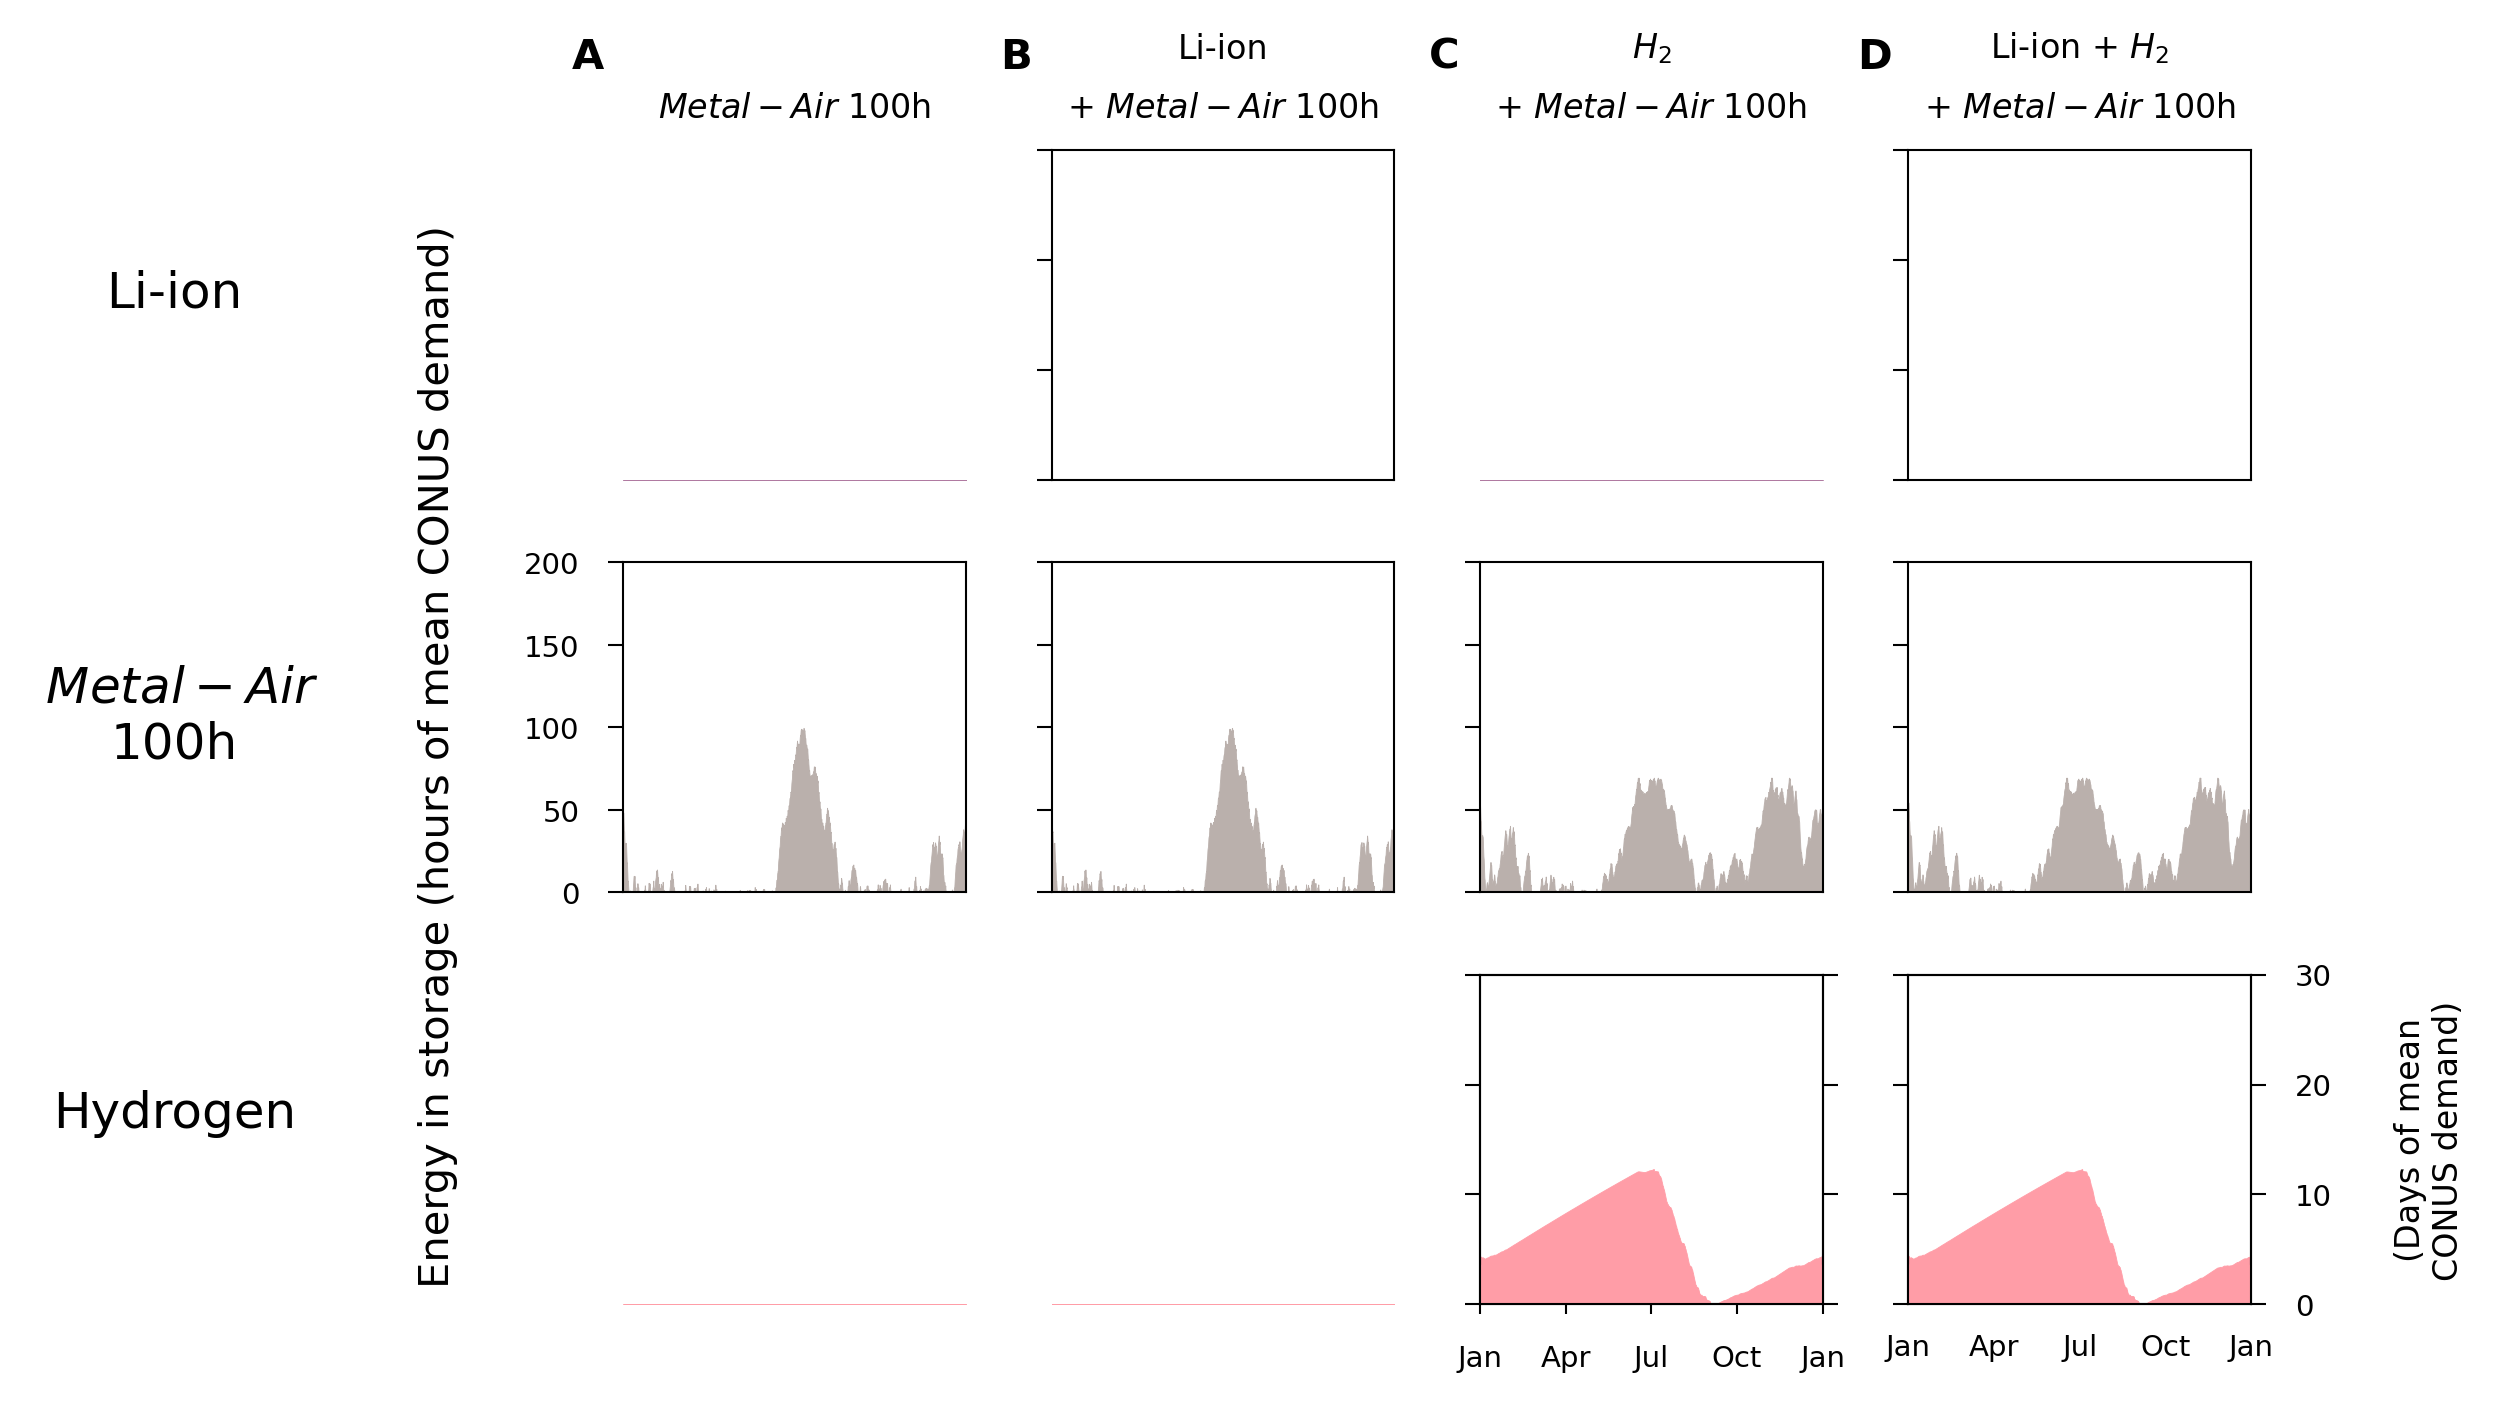

In [18]:
mm = 1/25.4 # millimeters in inches
fig_w = 172*mm
fig_h = 112*mm
fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(fig_w, fig_h), dpi=300)

w = 0.2
pgp_max = 600
pgp_days_max = 30
storage_x_max = 200
li_ion_max = 3

def plot_energy(ax, energy, energy_max, color):
    ax.fill_between(dates, energy, color=color, linewidth=w)
    ax.set_xlim(dates[0], dates[-1])
    ax.set_ylim(0, energy_max)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.xaxis.set_tick_params(direction='out', which='both', length=0)
    ax.yaxis.set_tick_params(direction='out', which='both')
    
def bottom_params(ax):
    ax.tick_params(axis='x', which='both', length=2.5)
    months = ['Jan', 'Apr', 'Jul', 'Oct', 'Jan']
    plt.xticks(np.linspace(dates[0], dates[-1], 5), months)
    
def left_params(ax):
    ax.set_yticklabels(ax.get_yticks())
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

    
fake_energy = np.array([0]*len(storage_x_energy_1))    

#########################################################################################################
#                                             CASE 1                                                   #
#########################################################################################################
    
# Li-ion energy in storage
plot_energy(ax[0,0], fake_energy, li_ion_max, purple)
left_params(ax[0,0])

# Storage X energy in storage
plot_energy(ax[1,0], storage_x_energy_1, storage_x_max, storage_x_color)
left_params(ax[1,0])

# PGP energy in storage
plot_energy(ax[2,0], fake_energy, pgp_max, pink)

ax_days_1 = ax[2,0].twinx()
pgp_energy_days_1 = fake_energy/24
plot_energy(ax_days_1, pgp_energy_days_1, pgp_days_max, pink)

left_params(ax[2,0])
bottom_params(ax[2,0])

#########################################################################################################
#                                             CASE 2                                                    #
#########################################################################################################

# Li-ion energy in storage
plot_energy(ax[0,1], li_ion_energy_2, li_ion_max, purple)

# Storage X energy in storage
plot_energy(ax[1,1], storage_x_energy_2, storage_x_max, storage_x_color)

# PGP energy in storage
plot_energy(ax[2,1], fake_energy, pgp_max, pink)

ax_days_2 = ax[2,1].twinx()
pgp_energy_days_2 = fake_energy/24
plot_energy(ax_days_2, pgp_energy_days_2, pgp_days_max, pink)

bottom_params(ax[2,1])

#########################################################################################################
#                                             CASE 3                                                    #
#########################################################################################################

# Li-ion energy in storage
plot_energy(ax[0,2], fake_energy, li_ion_max, purple)

# Storage X energy in storage
plot_energy(ax[1,2], storage_x_energy_3, storage_x_max, storage_x_color)

# PGP energy in storage
plot_energy(ax[2,2], pgp_energy_3, pgp_max, pink)

ax_days_3 = ax[2,2].twinx()
pgp_energy_days_3 = pgp_energy_3/24
plot_energy(ax_days_3, pgp_energy_days_3, pgp_days_max, pink)

bottom_params(ax[2,2])

#########################################################################################################
#                                             CASE 4                                                    #
#########################################################################################################

# Li-ion energy in storage
plot_energy(ax[0,3], li_ion_energy_4, li_ion_max, purple)

# Storage X energy in storage
plot_energy(ax[1,3], storage_x_energy_4, storage_x_max, storage_x_color)

# PGP energy in storage
plot_energy(ax[2,3], pgp_energy_4, pgp_max, pink)

ax_days_4 = ax[2,3].twinx()
pgp_energy_days_4 = pgp_energy_4/24
plot_energy(ax_days_4, pgp_energy_days_4, pgp_days_max, pink)
left_params(ax_days_4)
ax_days_4.set_ylabel('(Days of mean\nCONUS demand)', size=8)

bottom_params(ax[2,2])

#=================================================================================================
plt.tight_layout()

fig.text(-0.02, 0.5, 'Energy in storage (hours of mean CONUS demand)', va='center', ha='center', 
         rotation='vertical', size=10)

fig.text(-0.15, 0.85, 'Li-ion', va='center', ha='center', rotation='horizontal', size=12)

fig.text(-0.15, 0.53, ' $\it{Metal-Air}$\n100h', va='center', ha='center', rotation='horizontal', size=12)

fig.text(-0.15, 0.23, 'Hydrogen', va='center', ha='center', rotation='horizontal', size=12)

ax[0,0].text(-0.15, 1.25, 'A', transform=ax[0,0].transAxes, fontsize=10, fontweight='bold')
ax[0,1].text(-0.15, 1.25, 'B', transform=ax[0,1].transAxes, fontsize=10, fontweight='bold')
ax[0,2].text(-0.15, 1.25, 'C', transform=ax[0,2].transAxes, fontsize=10, fontweight='bold')
ax[0,3].text(-0.15, 1.25, 'D', transform=ax[0,3].transAxes, fontsize=10, fontweight='bold')

ax[0,0].set_title('$\it{Metal-Air}$ 100h', pad=8, linespacing=2, fontsize=8)
ax[0,1].set_title('Li-ion\n+ $\it{Metal-Air}$ 100h', pad=8, linespacing=2, fontsize=8)
ax[0,2].set_title('$H_{2}$\n+ $\it{Metal-Air}$ 100h', pad=8, linespacing=2, fontsize=8)
ax[0,3].set_title('Li-ion + $H_{2}$\n+ $\it{Metal-Air}$ 100h', pad=8, linespacing=2, fontsize=8)

plt.subplots_adjust(wspace=0.25, hspace=0.25)

#plt.savefig('Figure_5.jpg', bbox_inches='tight')

ax[0,0].axis('off')
ax[2,0].axis('off')
ax[2,1].axis('off')
ax[0,2].axis('off')
ax_days_1.axis('off')
ax_days_2.axis('off')

plt.show()


In [23]:
from extract_data_non_sep_power import get_data_non_sep_power

path = 'C:\\Users\\Anna\\Documents\\MEM-master\\Output_Data\\Mid_Duration\\Two_Techs_PGP_X\\Metal-Air_100h'
data = get_data_non_sep_power(path, 2, 'fixed_cost', 3, 'fixed_cost', False)

print(data)

{'var1_list': [0.015421882], 'var2_list': [0.018118958], 'solar_cost': [0.023911547373733737], 'wind_cost': [0.03568534330894291], 'batt_cost': [None], 'pgp_cost': [0.009068609730205936], 'third_tech_cost': [0], 'elec_cap': [], 'system_cost': [0.0758174218158526], 'ng_cost': [None], 'battery_cost': [0.017424228], 'battery_cap': [None], 'battery_tot_dispatch': [None], 'to_PGP_cost': [1.87e-05], 'to_PGP_cap': [0.04956068245699754], 'to_PGP_tot_dispatch': [290.0349321098617], 'PGP_storage_cost': [0.014700336], 'PGP_storage_cap': [246.4147592615848], 'PGP_storage_tot_dispatch': [247.00824336273652], 'from_PGP_cost': [0.000103], 'from_PGP_cap': [0.24468623069823695], 'from_PGP_tot_dispatch': [175.3758527875429], 'third_tech_cap': [69.43438778492758], 'third_tech_tot_dispatch': [700.238141939674], 'battery_time_stored': [], 'PGP_storage_time_stored': [117.78710934564666], 'third_tech_time_stored': [25.859058725129483], 'unmet_demand': [], 'PGP_dur': [1007.0642657676949], 'third_tech_cycles':